In [1]:
import pandas as pd
import numpy as np

In [2]:
path="/Users/gunnvantsaini/Data/Work/Python Trainings/PythonForModellers/Data/HR_comma_sep.csv"

In [3]:
data=pd.read_csv(path)

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
### Sanity Check?
## Figure if the column is usefull if included
## Figure out if there are any null values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
## Check if Satisfaction Level should be included or not?
data.groupby('left').agg({'satisfaction_level':['mean','median','min','max']})

satisfaction_level                   
                   mean median   min   max
left                                      
0              0.666810   0.69  0.12  1.00
1              0.440098   0.41  0.09  0.92

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

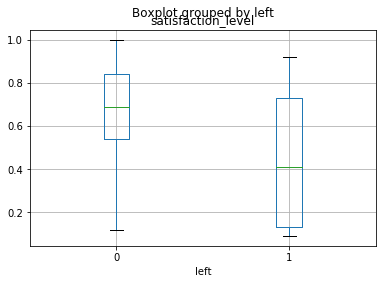

In [9]:
### 1==> Ppl who have left
## People who leave have on an average less satisfaction level
## May be variable should be included in the model?
data.boxplot(column='satisfaction_level',by='left')

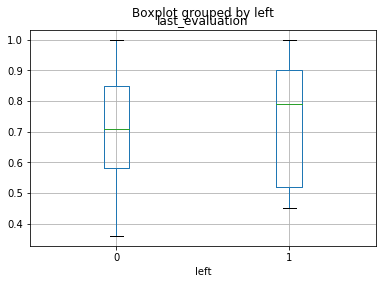

In [10]:
### last_evaluation (include it or not)
data.boxplot(column='last_evaluation',by='left')

In [11]:
### number_project
data['number_project'].unique() ## Continous, categorical

array([2, 5, 7, 6, 4, 3])

In [12]:
# 2.5, 3.2, 6.4
## How do I then find out if Number of Projects is related to Left?
data[['number_project','left']].head(10)

,number_project,left
0,2,1
1,5,1
2,7,1
3,5,1
4,2,1
5,2,1
6,6,1
7,5,1
8,5,1
9,2,1


In [15]:
### Can do this summary?
data.groupby(['left','number_project']).agg({'number_project':'count'})

number_project
left number_project                
0    2                          821
     3                         3983
     4                         3956
     5                         2149
     6                          519
1    2                         1567
     3                           72
     4                          409
     5                          612
     6                          655
     7                          256

In [16]:
### Ppl who do 2 projects and ppl who do 7 are similar
data['num_proj_d']=data['number_project'].map(lambda x: 1 if x==2 or x==7 else 0)

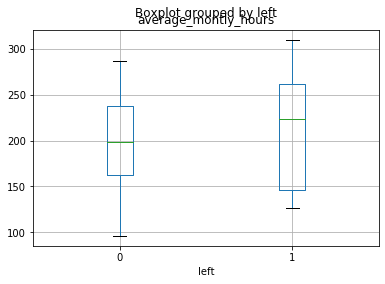

In [17]:
### average_montly_hours is related to left
data.boxplot(column='average_montly_hours',by='left')

In [18]:
data['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [19]:
data.groupby(['left','time_spend_company']).agg({'time_spend_company':'count'})

time_spend_company
left time_spend_company                    
0    2                                 3191
     3                                 4857
     4                                 1667
     5                                  640
     6                                  509
     7                                  188
     8                                  162
     10                                 214
1    2                                   53
     3                                 1586
     4                                  890
     5                                  833
     6                                  209

In [20]:
### Work_accident (Include)
data.groupby(['left','Work_accident']).agg({'Work_accident':'count'})

Work_accident
left Work_accident               
0    0                       9428
     1                       2000
1    0                       3402
     1                        169

In [24]:
169/(169+2000)

0.07791609036422315

In [25]:
3402/(3402+9428)

0.2651597817614965

In [23]:
### promotion_last_5years
data.groupby(['left','promotion_last_5years']).agg({'promotion_last_5years':'count'})

promotion_last_5years
left promotion_last_5years                       
0    0                                      11128
     1                                        300
1    0                                       3552
     1                                         19

In [26]:
### sales
data.groupby(['left','sales']).agg({'sales':'count'})

sales
left sales             
0    IT             954
     RandD          666
     accounting     563
     hr             524
     management     539
     marketing      655
     product_mng    704
     sales         3126
     support       1674
     technical     2023
1    IT             273
     RandD          121
     accounting     204
     hr             215
     management      91
     marketing      203
     product_mng    198
     sales         1014
     support        555
     technical      697

In [27]:
### salary

In [28]:
data.groupby(['left','salary']).agg({'salary':'count'})

salary
left salary        
0    high      1155
     low       5144
     medium    5129
1    high        82
     low       2172
     medium    1317

In [29]:
### train and test
train=data.sample(frac=0.70,random_state=200)
test=data.drop(train.index)

In [30]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [31]:
formula='''left~satisfaction_level+num_proj_d+time_spend_company+Work_accident+
sales+salary'''

In [32]:
mod1=smf.glm(formula,data=train,family=sm.families.Binomial()).fit()

In [43]:
train['sales'].unique()

array(['sales', 'technical', 'hr', 'accounting', 'product_mng', 'IT',
       'support', 'RandD', 'marketing', 'management'], dtype=object)

In [33]:
print(mod1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   left   No. Observations:                10499
Model:                            GLM   Df Residuals:                    10483
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3815.2
Date:                Mon, 22 Jul 2019   Deviance:                       7630.4
Time:                        15:10:59   Pearson chi2:                 9.41e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.4850      0.221    -15.777      0.000      -3.918      -3.052
sales[T.RandD]        

In [34]:
train['sales_RandD']=train['sales'].map(lambda x: 1 if x=='RandD' else 0)
test['sales_RandD']=test['sales'].map(lambda x: 1 if x=='RandD' else 0)

In [35]:
train['sales_hr']=train['sales'].map(lambda x: 1 if x=='hr' else 0)
test['sales_hr']=test['sales'].map(lambda x: 1 if x=='hr' else 0)

In [36]:
train['sales_management']=train['sales'].map(lambda x: 1 if x=='management' else 0)
test['sales_management']=test['sales'].map(lambda x: 1 if x=='management' else 0)

In [37]:
train['sales_support']=train['sales'].map(lambda x: 1 if x=='support' else 0)
test['sales_support']=test['sales'].map(lambda x: 1 if x=='support' else 0)

In [38]:
train['sales_technical']=train['sales'].map(lambda x: 1 if x=='technical' else 0)
test['sales_technical']=test['sales'].map(lambda x: 1 if x=='technical' else 0)

In [41]:
formula='''left~satisfaction_level+num_proj_d+time_spend_company+Work_accident+
sales_RandD+sales_hr+sales_management+sales_support+sales_technical+salary'''

In [42]:
mod2=smf.glm(formula,data=train,family=sm.families.Binomial()).fit()

In [44]:
print(mod2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   left   No. Observations:                10499
Model:                            GLM   Df Residuals:                    10487
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3816.1
Date:                Mon, 22 Jul 2019   Deviance:                       7632.2
Time:                        15:19:24   Pearson chi2:                 9.40e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.4349      0.199    -17.243      0.000      -3.825      -3.044
salary[T.low]          2.070

In [45]:
## how do I figure out how good this is?  Adj R2 (How much data is explained by the model)
# auc/roc/confusion/accuracy

In [46]:
import sklearn.metrics as metrics

In [47]:
pred_train=mod2.predict(train)

In [49]:
metrics.roc_auc_score(train['left'],pred_train)

0.8802982862685391

In [50]:
### AUC on the training data
# AUC is on test data?
pred_test=mod2.predict(test)

In [51]:
metrics.roc_auc_score(test['left'],pred_test)

0.8729005193297352

In [57]:
### test data auc 0.60
### train data auc 0.90
### Model is not doing a good job on new data,
pred_labels=(pred_train>0.5).map(lambda x: 1 if x else 0) 

In [58]:
metrics.confusion_matrix(train['left'],pred_labels)

array([[7368,  588],
       [1050, 1493]])

In [59]:
### Reworking: HR cost of misidentifying some-one to leave when he doesn't leave?
### HR misidentified some one to stay but he left?

In [60]:
d=pd.DataFrame({'Age':['Age-34','Age-56','Age-67']})

In [64]:
d=d['Age'].map(lambda x: int(x.split("-")[1]))

0    34
1    56
2    67
Name: Age, dtype: int64